### Step 1: Project Description: Heating, Ventilation, Air Conditioning System (HVAC) control with Fuzzy Inference System (FIS).

#### Step 2: Defining Inputs and Outputs

In [1]:
# Inputs:
# 1. Temperature Error (TE): Difference between desired temperature and current temperature.
# 2. Rate of Change of Temperature (RCT): Input showing how fast the temperature is changing.
# 3. Outer Temperature (OT): Temperature of the environment outside the controlled area.

# Output:
# - Control Signal (CS): Represents the control action to be performed
# (e.g. increase heat, decrease cooling).

class HVACFIS:
    def __init__(self):
        # Input ve outputu başlatıyoruz
        self.temperature_error = None
        self.rate_of_change = None
        self.outside_temperature = None
        self.control_signal = None

    def set_inputs(self, temperature_error, rate_of_change, outside_temperature):
        self.temperature_error = temperature_error
        self.rate_of_change = rate_of_change
        self.outside_temperature = outside_temperature

    def get_control_signal(self):
        return self.control_signal

# Example Usage:
fis = HVACFIS()
fis.set_inputs(2, -1, 15)
print(f"Temperature Error: {fis.temperature_error}, Rate of Change: {fis.rate_of_change}, Outside Temperature: {fis.outside_temperature}")


Temperature Error: 2, Rate of Change: -1, Outside Temperature: 15


In [2]:
!pip install scikit-fuzzy
!pip install matplotlib

#### Step 3: Defining membership functions

C:\Users\erenh\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


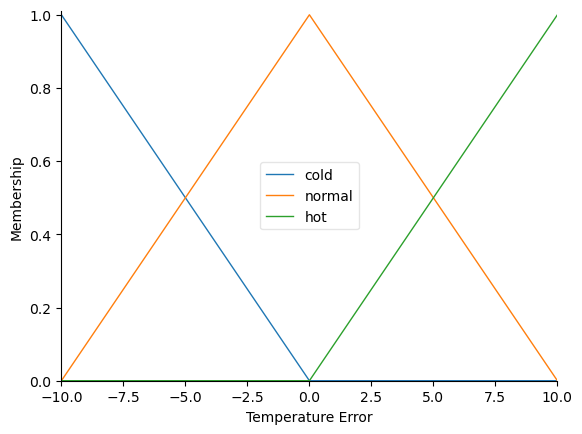

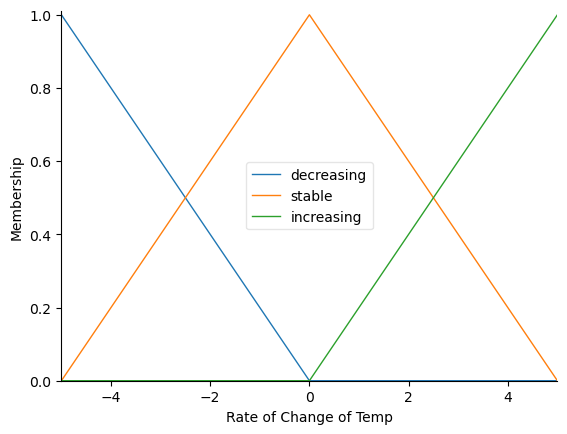

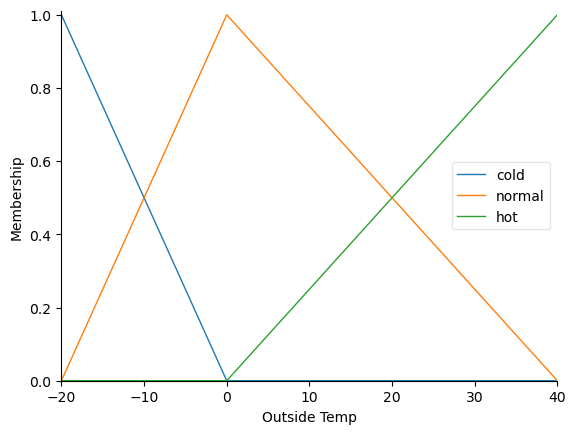

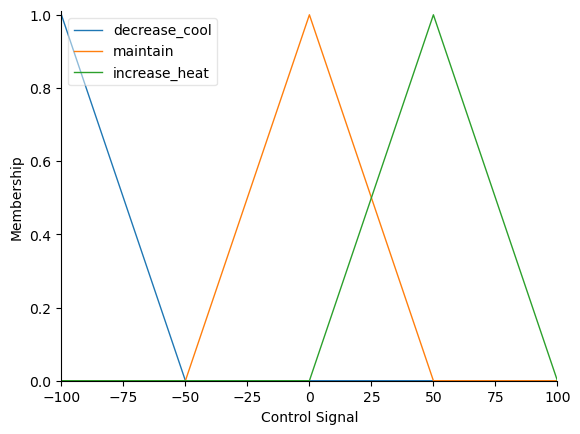

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Defining fuzzy variables
te = ctrl.Antecedent(np.arange(-10, 11, 1), 'Temperature Error')
rct = ctrl.Antecedent(np.arange(-5, 6, 1), 'Rate of Change of Temp')
ot = ctrl.Antecedent(np.arange(-20, 41, 1), 'Outside Temp')
cs = ctrl.Consequent(np.arange(-100, 101, 1), 'Control Signal')

# Membership functions
te['cold'] = fuzz.trimf(te.universe, [-10, -10, 0])
te['normal'] = fuzz.trimf(te.universe, [-10, 0, 10])
te['hot'] = fuzz.trimf(te.universe, [0, 10, 10])

rct['decreasing'] = fuzz.trimf(rct.universe, [-5, -5, 0])
rct['stable'] = fuzz.trimf(rct.universe, [-5, 0, 5])
rct['increasing'] = fuzz.trimf(rct.universe, [0, 5, 5])

ot['cold'] = fuzz.trimf(ot.universe, [-20, -20, 0])
ot['normal'] = fuzz.trimf(ot.universe, [-20, 0, 40])
ot['hot'] = fuzz.trimf(ot.universe, [0, 40, 40])

cs['decrease_cool'] = fuzz.trimf(cs.universe, [-100, -100, -50])
cs['maintain'] = fuzz.trimf(cs.universe, [-50, 0, 50])
cs['increase_heat'] = fuzz.trimf(cs.universe, [0, 50, 100])

# Visualization of the membership functions
import matplotlib.pyplot as plt

te.view()
rct.view()
ot.view()
cs.view()

plt.show()

#### Step 4: Define Rules

In [4]:
rule1 = ctrl.Rule(te['cold'] & rct['decreasing'] & ot['cold'], cs['increase_heat'])
rule2 = ctrl.Rule(te['cold'] & rct['decreasing'] & ot['normal'], cs['increase_heat'])
rule3 = ctrl.Rule(te['cold'] & rct['decreasing'] & ot['hot'], cs['increase_heat'])
rule4 = ctrl.Rule(te['cold'] & rct['stable'] & ot['cold'], cs['increase_heat'])
rule5 = ctrl.Rule(te['cold'] & rct['stable'] & ot['normal'], cs['increase_heat'])
rule6 = ctrl.Rule(te['cold'] & rct['stable'] & ot['hot'], cs['maintain'])
rule7 = ctrl.Rule(te['cold'] & rct['increasing'] & ot['cold'], cs['increase_heat'])
rule8 = ctrl.Rule(te['cold'] & rct['increasing'] & ot['normal'], cs['maintain'])
rule9 = ctrl.Rule(te['cold'] & rct['increasing'] & ot['hot'], cs['decrease_cool'])
rule10 = ctrl.Rule(te['normal'] & rct['decreasing'] & ot['cold'], cs['increase_heat'])
rule11 = ctrl.Rule(te['normal'] & rct['decreasing'] & ot['normal'], cs['maintain'])
rule12 = ctrl.Rule(te['normal'] & rct['decreasing'] & ot['hot'], cs['decrease_cool'])
rule13 = ctrl.Rule(te['normal'] & rct['stable'] & ot['cold'], cs['maintain'])
rule14 = ctrl.Rule(te['normal'] & rct['stable'] & ot['normal'], cs['maintain'])
rule15 = ctrl.Rule(te['normal'] & rct['stable'] & ot['hot'], cs['maintain'])
rule16 = ctrl.Rule(te['normal'] & rct['increasing'] & ot['cold'], cs['decrease_cool'])
rule17 = ctrl.Rule(te['normal'] & rct['increasing'] & ot['normal'], cs['decrease_cool'])
rule18 = ctrl.Rule(te['normal'] & rct['increasing'] & ot['hot'], cs['decrease_cool'])
rule19 = ctrl.Rule(te['hot'] & rct['decreasing'] & ot['cold'], cs['maintain'])
rule20 = ctrl.Rule(te['hot'] & rct['decreasing'] & ot['normal'], cs['decrease_cool'])


#### Step 5: Implementing this FIS in Python

In [5]:
# Creating a control system
temp_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                               rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])

# Creating a simulation
temp_ctrl_simulation = ctrl.ControlSystemSimulation(temp_ctrl)


#### Step 6: Testing the fuzzy inference system 

In [6]:
# Input consisting of sample values
fis.set_inputs(2, -1, 15)

# Applying sample inputs to the simulation
temp_ctrl_simulation.input['Temperature Error'] = fis.temperature_error
temp_ctrl_simulation.input['Rate of Change of Temp'] = fis.rate_of_change
temp_ctrl_simulation.input['Outside Temp'] = fis.outside_temperature

# Fuzzy Aggregation
temp_ctrl_simulation.compute()

# Receiving the control signal
fis.control_signal = temp_ctrl_simulation.output['Control Signal']
print(f"The control signal is: {fis.get_control_signal()}")


The control signal is: -13.40549208258168


#### Step 7: Fine-Tuning and Optimization

This step involves modifying the membership function, rules, etc. based on performance. Includes setting. It should be tested in real life and done accordingly.

In [7]:
#1. Membership Functions Optimization Example:

# Tweaking the 'cold' membership function for Temperature Error
te['cold'] = fuzz.trimf(te.universe, [-7, -4, 0])

# Tweaking the 'decreasing' membership function for Temperature Rate of Change
rct['decreasing'] = fuzz.trimf(rct.universe, [-4, -2, 0])

# Tweaking the 'warm' membership function for Outside Temperature
ot['hot'] = fuzz.trimf(ot.universe, [10, 20, 40])


In [8]:
#2. Rearrangement of the Rules:

# We will review the rules again and make changes/adjustments if necessary.

# Modify an existing rule
rule1 = ctrl.Rule(te['cold'] & rct['decreasing'] & ot['cold'], cs['increase_heat'])

# Adding a new rule
rule21 = ctrl.Rule(te['hot'] & rct['stable'] & ot['normal'], cs['decrease_cool'])


#### Step 8: Integration with HVAC System

In this step we will show how to integrate the Fuzzy Inference System into the larger HVAC control system. Let's not forget that this is a theoretical exercise.


Conceptual Integration Steps:

    Defining the Communication Protocol:
          Determine how the FIS will communicate with the rest of the HVAC control system. This may include setting up APIs, message queues, or direct function calls.

      Determine Input Sources:
          Determine where the inputs (Temperature Error, Temperature Change Rate, Outdoor Temperature) will come from within the HVAC system. For example, there may be sensors.

      Set Up Data Exchange:
          Create a mechanism to transfer input data from the HVAC system to the FIS. This may involve creating functions or interfaces for data retrieval.

      Processing FIS Output:
          Define how the FIS (Control Signal) output will be used by the HVAC system. This may include adjusting control parameters, adjusting set points, or activating specific HVAC components.

      Synchronization and Scheduling:
          Make sure the FIS operates in sync with the overall control loop of the HVAC system. This may involve coordinating the implementation of FIS with other control strategies.


Hypothetical Integration Example:

For this example, let's assume FIS is integrated into a simplified HVAC control system. We will define some conceptual functions for communication and data exchange.

In [ ]:
#Codes for Step 8:
# Hypothetical HVAC Control System

class HVACControlSystem:
    def __init__(self, fis):
        self.fis = fis

    def get_sensor_data(self):
        # Collection of simulated (sample) data
        temperature_error = get_temperature_error_from_sensor()
        rate_of_change = get_rate_of_change_from_sensor()
        outside_temperature = get_outside_temperature_from_sensor()
        return temperature_error, rate_of_change, outside_temperature

    def adjust_hvac_system(self):
        # Transferring the data received from the sensor
        te, rct, ot = self.get_sensor_data()

        # Creating inputs for FIS
        self.fis.set_inputs(te, rct, ot)

        # Apply FIS Control Signal
        control_signal = self.fis.get_control_signal()

        # Adjust the HVAC system according to the data of the Control System
        if control_signal > 0:
            increase_heat()
        elif control_signal < 0:
            decrease_cool()
        else:
            maintain_temperature()

    def simulate_hvac_operation(self):
        # Simüle edilmiş HVAC işlemi
        for _ in range(simulation_duration):
            self.adjust_hvac_system()
            # Other control strategies can be added here

# Instantiate FIS (Fuzzy Inference System)
fis = HVACFIS()

# Instantiate HVAC Control System with FIS
hvac_system = HVACControlSystem(fis)

# Simulate the HVAC system
simulation_duration = 60  # Let's assume it's a 60 minute simulation
hvac_system.simulate_hvac_operation()


In this example, we created a hypothetical HVACControlSystem class that contains FIS. This control system has the functions of receiving sensor data (get_sensor_data), adjusting the HVAC system according to FIS output (adjust_hvac_system), and simulating HVAC operation (simulate_hvac_operation).

Let's not forget that this is simplified and representative. In reality, it will involve much more complex interactions and details depending on the structure of the HVAC control system.

##### Step 9: Safety and Troubleshooting:

• Establishing mechanisms to handle exceptional situations and ensure the safe operation of the system.

In this step, we will discuss how to implement security measures and debugging mechanisms for FIS integrated into the HVAC control system.


Safety and Troubleshooting:

     Defining Security Thresholds:
          Set predefined limits for input and output values. These thresholds act as safety limits to prevent the system from entering unsafe states.

      Input Validation:
          Before applying inputs to FIS, verify them to ensure they are within acceptable ranges. If inputs are outside defined thresholds, take appropriate action (e.g., issue an alert, shut down the system).

      Output Validation:
          Check the FIS output to ensure it falls within acceptable control signal ranges. If the output is outside the safety limits, take corrective action (e.g. override control signal, trigger safety shutdown).

      Emergency Shutdown Procedures:
          Define protocols for emergencies. This may include procedures to shut down the HVAC system in the event of a critical malfunction or unsafe condition.

      Fault Detection and Handling:
          Implement mechanisms to detect errors or anomalies in system behavior. This may include monitoring sensor data, checking for unexpected output values, or using diagnostic algorithms.
         

Safety and Troubleshooting Example:

In this example below, let's assume that we implement security measures within the HVACControlSystem class.

In [ ]:
# Adding Safety Measures to the HVAC Control System

class HVACControlSystem:
    # (The code we wrote above)

    def validate_inputs(self, te, rct, ot):
        # Define inputs according to predefined security thresholds
        if not (-10 <= te <= 10) or not (-5 <= rct <= 5) or not (-20 <= ot <= 40):
            raise ValueError("Input values outside safety limits")

    def verify_output(self, control_signal):
        # Confirm that the control system outputs within an acceptable range
        if not (-100 <= control_signal <= 100):
            raise ValueError("Control signal outside safety limits")

    def adjust_hvac_system(self):
        te, rct, ot = self.get_sensor_data()

        # Transfer inputs
        self.validate_inputs(te, rct, ot)

        # Create inputs for FIS
        self.fis.set_inputs(te, rct, ot)

        # Apply FIS control
        control_signal = self.fis.get_control_signal()

        # Validate the output
        self.verify_output(control_signal)

        # Adjust the HVAC system according to the control signal
        if control_signal > 0:
            increase_heat()
        elif control_signal < 0:
            decrease_cool()
        else:
            maintain_temperature()

# Instantiate the FIS and HVAC system as we did above...

# Simulation of safe HVAC system:
simulation_duration = 60
try:
    hvac_system.simulate_hvac_operation()
except Exception as e:
    print(f"An error occurred: {e}")
    # Perform fault handling procedures such as emergency shutdown
    emergency_shutdown()

In this example, we added security measures to the HVACControlSystem class. The function of the validate_inputs function is to check whether the inputs are within the predefined security limits, and the verify_output function ensures that the control signal is within an acceptable range.

If any security violations are detected, this will raise an exception. In a real scenario, appropriate troubleshooting procedures such as "initiate emergency shutdown" are applied.